# matrix_examples.ipynb : examples of linear algebra

In [1]:
from pylab import *
# note linear algebra functions below (solve, inv, eig, etc) come from numpy.linalg

solve matrix equation:  
$$\begin{align}
x + y + z = -1 \\  
x - 2y - z = -2 \\
x + 3y - 1 = -5
\end{align}$$  
$${\bf A x = b}$$

In [2]:
A = array([[1,1,1],
           [1,-2,-1],
           [1,3,-1]])
b = array([-1,-2,-5])
x = solve(A,b) 
print('x solution = ', x)

x solution =  [-1.8 -0.6  1.4]


In [3]:
b_check = A @ x # alternatively dot(A,x)
print('b check = ',b_check,' should be = ', b)

b check =  [-1. -2. -5.]  should be =  [-1 -2 -5]


more checks, good to machine precision, not exactly zero:

In [4]:
print('check: ', A@x == b)
print('check: ', A@x / b - 1.0)

check:  [False  True  True]
check:  [2.22044605e-16 0.00000000e+00 0.00000000e+00]


another way to do it:  
$${\bf x = A}^{-1} {\bf b}$$

In [5]:
x = inv(A) @ b
print('x solution =', x)
print('check =', A@x / b - 1.0)

x solution = [-1.8 -0.6  1.4]
check = [ 0.00000000e+00 -2.22044605e-16  2.22044605e-16]


singular matrix, recognized by NumPy:

In [6]:
A2 = array([[1,1],
           [2,2]])
try: 
    print(inv(A2))
except LinAlgError: 
    print('Singular Matrix - no in')

Singular Matrix - no in


singular matrix, not recognized by NumPy:

In [7]:
A3 = array([[1,2,3],
           [4,5,6],
           [7,8,9]])
print(inv(A3))

[[-4.50359963e+15  9.00719925e+15 -4.50359963e+15]
 [ 9.00719925e+15 -1.80143985e+16  9.00719925e+15]
 [-4.50359963e+15  9.00719925e+15 -4.50359963e+15]]


check for identity matrix:  
$${\bf A}^{-1} {\bf A} = {\bf I}$$ ?

In [8]:
print(inv(A3) @ A3)

[[ 0. -4. -8.]
 [-8.  0.  0.]
 [ 4.  0.  0.]]


other tests:

In [9]:
print('determinant = ', det(A3))
print('condition number = ', cond(A3))

determinant =  6.66133814775094e-16
condition number =  1.1439441181880765e+17


Moore$-$Penrose pseuo-inverse (generalized inverse, or least-squares best-fit): 

In [10]:
pinv_A3 = pinv(A3)
print(pinv_A3)
print(pinv_A3 @ A3)

[[-6.38888889e-01 -1.66666667e-01  3.05555556e-01]
 [-5.55555556e-02 -2.60208521e-16  5.55555556e-02]
 [ 5.27777778e-01  1.66666667e-01 -1.94444444e-01]]
[[ 0.83333333  0.33333333 -0.16666667]
 [ 0.33333333  0.33333333  0.33333333]
 [-0.16666667  0.33333333  0.83333333]]


eigenvalues and eigenvectors :  
$$ {\bf A v} = \lambda {\bf v}$$

In [11]:
A4 = array([[0.8,0.3],
           [0.2,0.7]])
lam,v = eig(A4)  # "lambda" is reserved word in python, don't use it here
print('eigenvalues: ', lam)
print('eigenvalues: ', eigvals(A4))
print('eigenvectors (as *columns*): ')
print(v)

eigenvalues:  [1.  0.5]
eigenvalues:  [1.  0.5]
eigenvectors (as *columns*): 
[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]


check:

In [12]:
print(A4@v - lam*v)

[[1.11022302e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]


Alternative function for complex Hermitian or real symmetric matrix:

In [13]:
A5 = array([[0.8,0],
            [0,0.7]])
print(eig(A5))
print(eigh(A5))

(array([0.8, 0.7]), array([[1., 0.],
       [0., 1.]]))
(array([0.7, 0.8]), array([[0., 1.],
       [1., 0.]]))


circuit example, where the goal is to find the power through resistor #5 for a series of voltages $E_2$:  
$${\bf A i} = {\bf b}$$

Solve system of equations for the resistor network in Slides: 

Find power through resistor 2 for $E_2 = 23$ V:

In [15]:
R1, R2, R3, R4, R5 = 1.0, 1.0, 2.0, 2.0, 5.0 # set resistances
E1, E3 = 2.0, 5.0 # set fixed voltages
E2_vec = linspace(0,20,100) # set the range of the variable voltage

A_R = array([[1,-1,-1],
            [-R1-R2,0,-R3],
            [0,-R4-R5,R3]])
A_R_inv = inv(A_R) # this is more efficient than repetitively using i = solve(A_R,b)

P5 = array([]) # power through resistor 5
for E2 in E2_vec :
    b_E = array([0,E2-E1,E3-E2])
    i = A_R_inv @ b_E
    P5 = append(P5,i[1]**2 * R5) # note that i_1,2,3 are i[0,1,2]

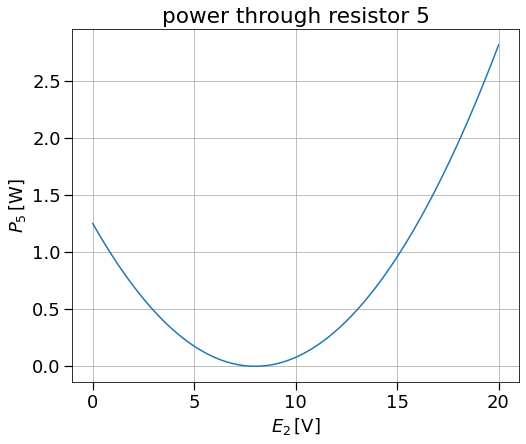

In [14]:
# Plot results 

rcParams.update({'font.size': 18})
fig1 = figure(figsize=(8,6.5))
plot(E2_vec,P5)
xlabel('$E_2 \, [\mathrm{V}]$')
ylabel('$P_5 \, [\mathrm{W}]$')
grid('on')
title('Power through resistor 5')
tick_params('both', length=8, width=1.2, which='major') # bigger axis ticks